In [5]:
import tensorflow as tf
from tensorflow.keras import layers

import numpy as np
import matplotlib.pyplot as plt

tf.enable_eager_execution()
tf.__version__

'1.14.0'

In [2]:
# Load training and eval data from tf.keras
(train_data, train_labels), (test_data, test_labels) = \
    tf.keras.datasets.mnist.load_data()

train_data = train_data / 255.
train_data = train_data.reshape(-1, 784)
train_data = train_data.astype(np.float32)
train_labels = train_labels.astype(np.int32)

test_data = test_data / 255.
test_data = test_data.reshape(-1, 784)
test_data = test_data.astype(np.float32)
test_labels = test_labels.astype(np.int32)

11493376/11490434 [==============================] - 0s 0us/step


label = 3


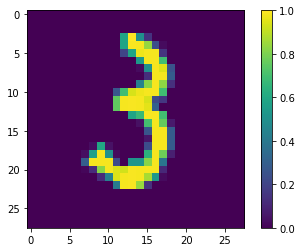

In [3]:
index = 1234
print("label = {}".format(train_labels[index]))
plt.imshow(train_data[index].reshape(28, 28))
plt.colorbar()
#plt.gca().grid(False)
plt.show()

In [0]:
model = tf.keras.models.Sequential()

# Adds a densely-connected layer with 64 units to the model:
#model.add(layers.Dense(64, activation='relu'))
# Add another:
#model.add(layers.Dense(64, activation='relu'))
# Add a softmax layer with 10 output units:
model.add(layers.Dense(10, activation='softmax'))

In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(1e-4),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [8]:
# without training, just inference a model in eager execution:
predictions = model(train_data[0:1], training=False)
print("Predictions: ", predictions.numpy())

Predictions:  [[0.07041582 0.1634356  0.04975085 0.07816199 0.12242138 0.10231894
  0.13974543 0.11057703 0.11050968 0.05266325]]


In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [10]:
batch_size = 32
max_epochs = 10

# using `numpy type` data
history = model.fit(train_data, train_labels,
                    batch_size=batch_size, epochs=max_epochs,
                    validation_split=0.05)
# using `tf.data.Dataset`
#history = model.fit(train_dataset, epochs=max_epochs,
#                    steps_per_epoch=int(len(train_data) / batch_size))

W0628 23:37:00.812219 140560536614784 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 57000 samples, validate on 3000 samples
Epoch 1/10
57000/57000 [==============================] - 3s 53us/sample - loss: 1.1800 - acc: 0.7156 - val_loss: 0.6041 - val_acc: 0.8947
Epoch 2/10
57000/57000 [==============================] - 3s 46us/sample - loss: 0.5792 - acc: 0.8632 - val_loss: 0.3971 - val_acc: 0.9180
Epoch 3/10
57000/57000 [==============================] - 3s 45us/sample - loss: 0.4550 - acc: 0.8842 - val_loss: 0.3236 - val_acc: 0.9260
Epoch 4/10
57000/57000 [==============================] - 3s 45us/sample - loss: 0.4012 - acc: 0.8941 - val_loss: 0.2889 - val_acc: 0.9297
Epoch 5/10
57000/57000 [==============================] - 3s 45us/sample - loss: 0.3712 - acc: 0.9003 - val_loss: 0.2695 - val_acc: 0.9330
Epoch 6/10
57000/57000 [==============================] - 3s 45us/sample - loss: 0.3521 - acc: 0.9043 - val_loss: 0.2563 - val_acc: 0.9367
Epoch 7/10
57000/57000 [==============================] - 3s 46us/sample - loss: 0.3387 - acc: 0.9071 - val_loss: 0.2

In [11]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

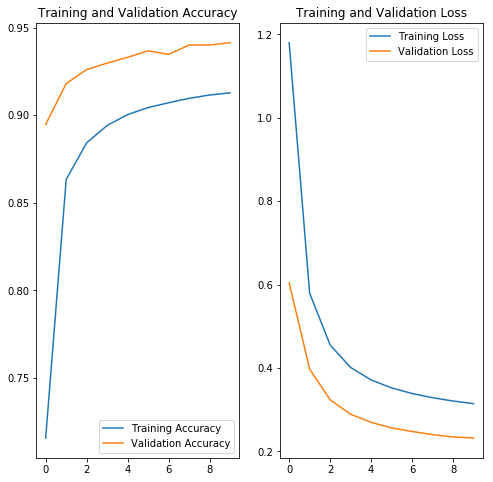

In [12]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(max_epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [13]:
results = model.evaluate(test_data, test_labels, batch_size=batch_size)

10000/10000 [==============================] - 0s 20us/sample - loss: 0.2983 - acc: 0.9171


In [14]:
# loss
print("loss value: {:.3f}".format(results[0]))
# accuracy
print("accuracy value: {:.4f}%".format(results[1]*100))

loss value: 0.298
accuracy value: 91.7100%


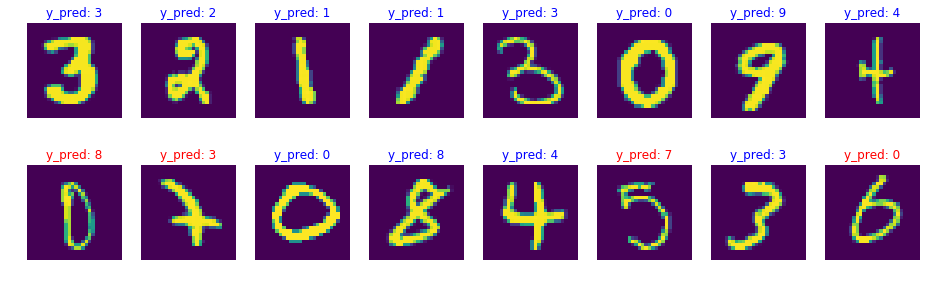

In [15]:
np.random.seed(219)
test_batch_size = 16
batch_index = np.random.choice(len(test_data), size=test_batch_size, replace=False)

batch_xs = test_data[batch_index]
batch_ys = test_labels[batch_index]
y_pred_ = model(batch_xs, training=False)

fig = plt.figure(figsize=(16, 10))
for i, (px, py) in enumerate(zip(batch_xs, y_pred_)):
  p = fig.add_subplot(4, 8, i+1)
  if np.argmax(py) == batch_ys[i]:
    p.set_title("y_pred: {}".format(np.argmax(py)), color='blue')
  else:
    p.set_title("y_pred: {}".format(np.argmax(py)), color='red')
  p.imshow(px.reshape(28, 28))
  p.axis('off')